In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

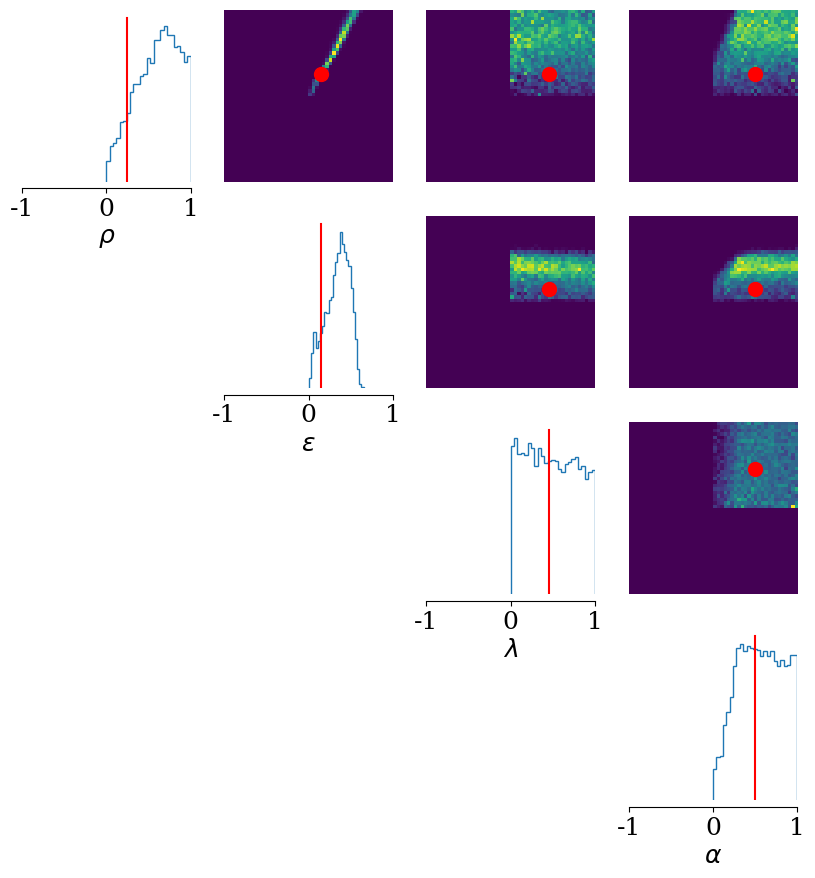

In [7]:
hop = np.loadtxt("../../exp_dir/1709740276.7566578/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[-1,1], [-1,1], [-1,1], [-1,1]], points=[np.array([0.25, 0.15, 0.45, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


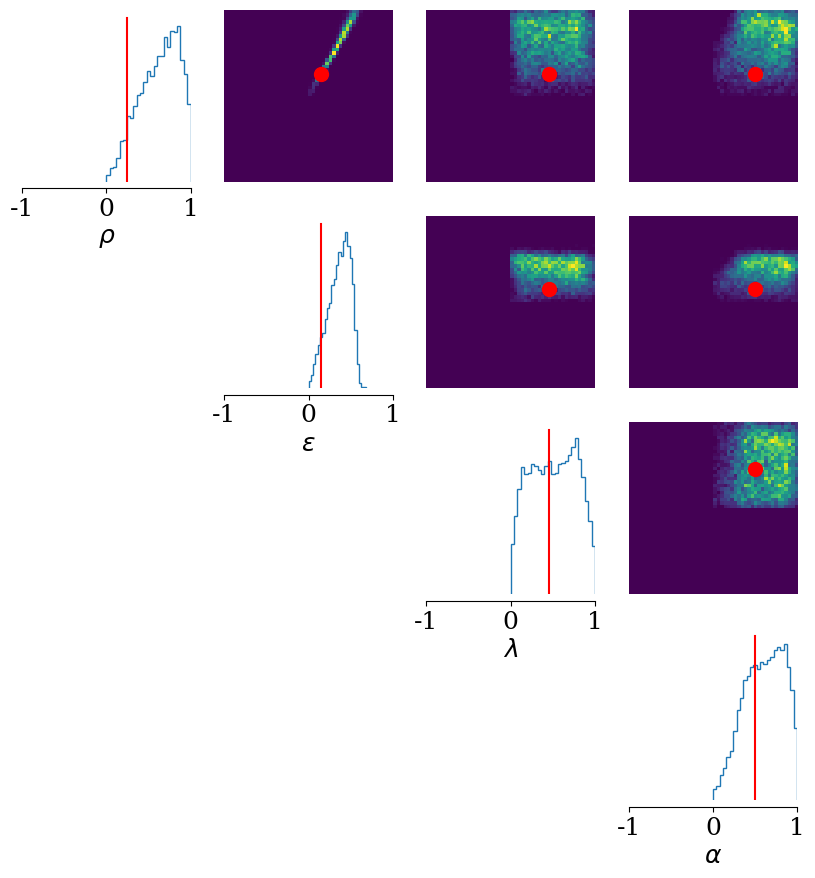

In [8]:
hop = np.loadtxt("../../exp_dir/1709742536.959185/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[-1,1], [-1,1], [-1,1], [-1,1]], points=[np.array([0.25, 0.15, 0.45, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


In [9]:
file_name = "1709632558.4055877"
with open(f"../../exp_dir/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

print(posterior)

Posterior conditional density p(θ|x) (amortized). Evaluates and samples by default at x=[[1.4983195066452026, 0.2647950053215027]].

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


In [11]:
x = torch.tensor([1.49832,
                0.264795])

# Assume `posterior` is your DirectPosterior object and `x` is your data
samples = posterior.sample((1000,), x)  # Generate 1000 samples from the posterior
log_probs = posterior.log_prob(samples, x)  # Compute the log probability of the samples

print(samples.shape)
print(log_probs.shape)

# Convert the tensor to a numpy array
samples_np = samples.numpy()


Drawing 1000 posterior samples: 9413it [00:00, 31774.65it/s]                        


torch.Size([1000, 4])
torch.Size([1000])


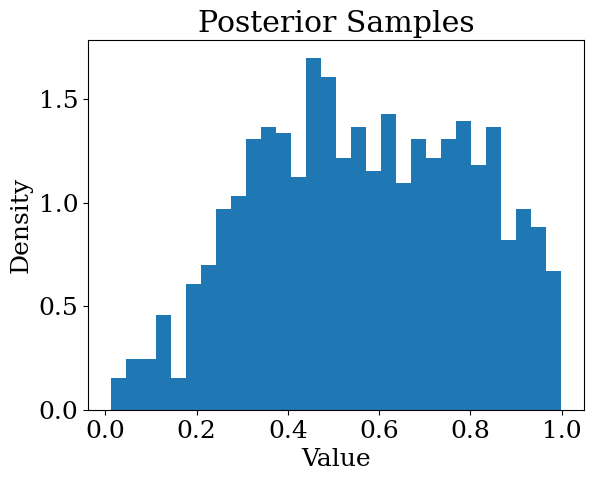

In [13]:
plt.hist(samples_np[:, 3], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior Samples')
plt.show()

In [12]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


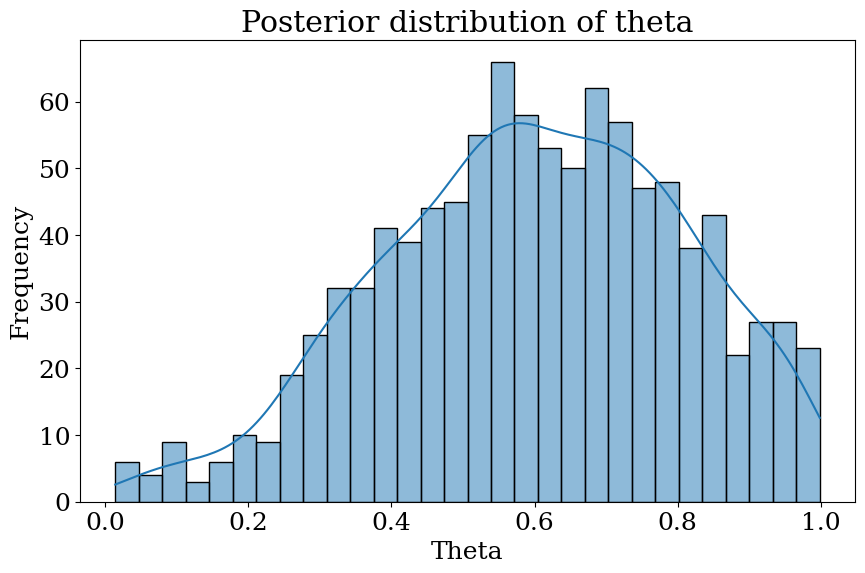

In [38]:
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(samples_np[:, 1], bins=30, kde=True)
plt.title('Posterior distribution of theta')
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.show()

In [34]:
import torch.optim as optim

# Initialize theta at some reasonable starting point
theta_map = torch.zeros(4, requires_grad=True)

# Define optimizer
optimizer = optim.Adam([theta_map], lr=0.01)

print(posterior.log_prob(theta_map, x))

# Optimization loop
for step in range(1000):
    optimizer.zero_grad()
    log_prob = posterior.log_prob(theta_map, x)
    (-log_prob).backward()  # We want to maximize log_prob, so minimize -log_prob
    optimizer.step()

print('MAP estimate of theta:', theta_map.detach().numpy())

tensor([-2.4873])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn